### WSJ Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load Part-of-Speech data 
from lxmls.readers.pos_corpus import PostagCorpusData
data = PostagCorpusData()

### Check Numpy and Pytorch Gradients match
As we did with the feed-forward network, we will no implement a Recurrent Neural Network (RNN) in Pytorch. For this complete the log `forward()` method in 

    lxmls/deep_learning/pytorch_models/rnn.py

Load the RNN model in numpy and Python for comparison

In [3]:
from lxmls.deep_learning.numpy_models.rnn import NumpyRNN
numpy_model = NumpyRNN(
    input_size=data.input_size,
    embedding_size=50,
    hidden_size=20,
    output_size=data.output_size,
    learning_rate=0.1
)

In [4]:
from lxmls.deep_learning.pytorch_models.rnn import PytorchRNN
model = PytorchRNN(
    input_size=data.input_size,
    embedding_size=50,
    hidden_size=20,
    output_size=data.output_size,
    learning_rate=0.1
)

To debug your code you can compare the numpy and Pytorch gradients using

In [5]:
import torch
torch.autograd.set_detect_anomaly(True)

# Get gradients for both models
batch = data.batches('train', batch_size=1)[0]
gradient_numpy = numpy_model.backpropagation(batch['input'], batch['output'])
gradient = model.backpropagation(batch['input'], batch['output'])

In [6]:
gradient[0].shape, gradient_numpy[0].shape

(torch.Size([4786, 50]), (4786, 50))

and then plotting them with matplotlib

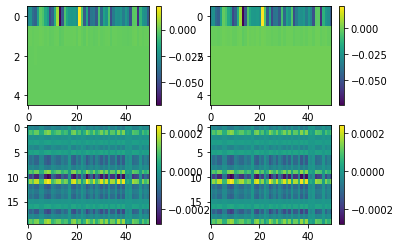

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# Gradient for  word embeddings in the example
plt.subplot(2,2,1)
plt.imshow(gradient_numpy[0][batch['input'], :], aspect='auto', interpolation='nearest')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(gradient[0].numpy()[batch['input'], :], aspect='auto', interpolation='nearest')
plt.colorbar()
# Gradient for  word embeddings in the example
plt.subplot(2,2,3)
plt.imshow(gradient_numpy[1], aspect='auto', interpolation='nearest')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(gradient[1].numpy(), aspect='auto', interpolation='nearest')
plt.colorbar()
plt.show()

In [8]:
# Alterbative native CuDNN native implementation of RNNs
from lxmls.deep_learning.pytorch_models.rnn import FastPytorchRNN
fast_model = FastPytorchRNN(
    input_size=data.input_size,
    embedding_size=50,
    hidden_size=20,
    output_size=data.output_size,
    learning_rate=0.1
)

### Train model
Once you are confident that your implementation is working correctly you can run it on the POS task using the Pytorch code from the Exercise 6.1.

In [9]:
num_epochs = 10

In [10]:
model = model

In [ ]:
import numpy as np
import time

# Get batch iterators for train and test
train_batches = data.batches('train', batch_size=1)
dev_set = data.batches('dev', batch_size=1)
test_set = data.batches('test', batch_size=1)

# Epoch loop
start = time.time()
for epoch in range(num_epochs):

    # Batch loop
    for batch in train_batches:
        model.update(input=batch['input'], output=batch['output'])

    # Evaluation dev
    is_hit = []
    for batch in dev_set:
        is_hit.extend(model.predict(input=batch['input']) == batch['output'])
    accuracy = 100*np.mean(is_hit)

    # Inform user
    print("Epoch %d: dev accuracy %2.2f %%" % (epoch+1, accuracy))

print("Training took %2.2f seconds per epoch" % ((time.time() - start)/num_epochs))    
    
# Evaluation test
is_hit = []
for batch in test_set:
    is_hit.extend(model.predict(input=batch['input']) == batch['output'])
accuracy = 100*np.mean(is_hit)

# Inform user
print("Test accuracy %2.2f %%" % accuracy)